In [1]:
import json
import pandas as pd
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
df_stream = pd.read_json('StreamingHistory0.json')

In [3]:
df_stream.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [4]:
df_stream.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [5]:
df_stream.head(10)

,endTime,artistName,trackName,msPlayed
0,2022-07-04 18:28,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",1810
1,2022-07-05 16:41,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",15350
2,2022-07-05 17:33,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",3780
3,2022-07-19 19:55,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",530
4,2022-07-21 22:33,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",9070
5,2022-07-26 10:48,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",3920
6,2022-07-26 19:35,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",22400
7,2022-07-27 08:10,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",2360
8,2022-07-27 12:02,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",4230
9,2022-07-27 19:52,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",5460


In [6]:
with open('YourLibrary.json') as f:
    df = json.load(f)
    
df_library = df["tracks"]

df_library_final = pd.DataFrame(df_library, columns = ["artist", "album","track","uri"])

df_library_final.head(10)

,artist,album,track,uri
0,Santhosh Narayanan,Madras,Agayam Theepiditha,spotify:track:19nEFsswIftvopxVMUAM9b
1,Sid Sriram,Enai Noki Paayum Thota (Original Motion Pictur...,Visiri,spotify:track:5Mt9VMVJc2T5Pa3qKUfw9t
2,S. P. Balasubrahmanyam,Chandramukhi,Athithom,spotify:track:2NeyA5MOLBZW21zKHBC2G2
3,G. V. Prakash,Aayirathil Oruvan (Original Motion Picture Sou...,Maalai Neram,spotify:track:3S4ELYAcxunw60elgJwAwn
4,Harris Jayaraj,The Legend,Kone Komaane,spotify:track:0pgcemvSQD0ZdZBDtZqY5o
5,Vicanes Jay,Adiyeh Kirukki (Single),Adiyeh Kirukki,spotify:track:7kq5biqsSgrS156U5mpBp2
6,Alyssa Mendonsa,Zindagi Na Milegi Dobara,Khaabon Ke Parinday,spotify:track:14eotumM24MhIgzidgN3Jx
7,Santhosh Narayanan,Enakkul Oruvan,Poo Avizhum Pozhudhil,spotify:track:0r1ppERo8Mp5iKg3lANvnB
8,Matadoria,Marap,Marap,spotify:track:66aRgKCtqQFWLSGeFKgWQt
9,Ian Storm,Clocks,Clocks,spotify:track:56BxlyQbuS5QGc1QZ9WgfQ


In [7]:
df_stream["msPlayed"] = df_stream["msPlayed"]/1000
df_stream = df_stream.rename(columns = {"msPlayed": "SecondsPlayed"})

In [2]:
df_stream.groupby(["artistName"]).sum()

NameError: name 'df_stream' is not defined

In [9]:
df_stream["endTime"] = pd.to_datetime(df_stream["endTime"])
df_stream

,endTime,artistName,trackName,SecondsPlayed
0,2022-07-04 18:28:00,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",1.810
1,2022-07-05 16:41:00,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",15.350
2,2022-07-05 17:33:00,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",3.780
3,2022-07-19 19:55:00,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",0.530
4,2022-07-21 22:33:00,Anirudh Ravichander,"Pathala Pathala (From ""Vikram"")",9.070
...,...,...,...,...
715,2023-06-29 08:16:00,Naallanaa Murukku - The RJ Balaji Podcast,Let it go .!,1138.653
716,2023-06-29 09:10:00,Naallanaa Murukku - The RJ Balaji Podcast,தொண்டையில் தாழம்பு !!!,85.386
717,2023-06-29 09:11:00,Naallanaa Murukku - The RJ Balaji Podcast,தொண்டையில் தாழம்பு !!!,80.592
718,2023-06-29 09:33:00,Naallanaa Murukku - The RJ Balaji Podcast,கற்றது தமிழ் !!!,1279.307


In [10]:
df_hour_plot = df_stream.groupby(df_stream['endTime'].dt.hour).sum()

<AxesSubplot:xlabel='endTime'>

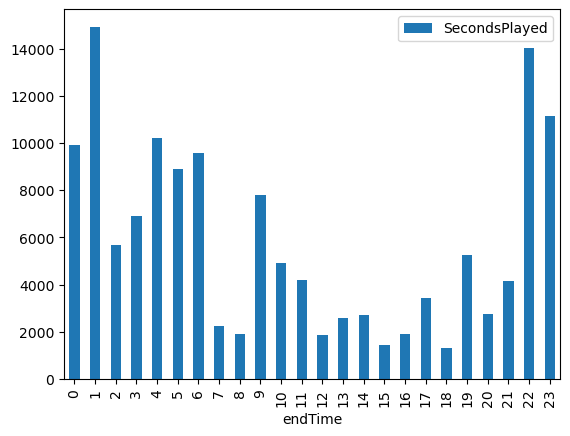

In [11]:
df_hour_plot.plot.bar()

In [12]:
df_monthly_plot = df_stream.groupby(df_stream['endTime'].dt.month).sum()

<AxesSubplot:xlabel='endTime'>

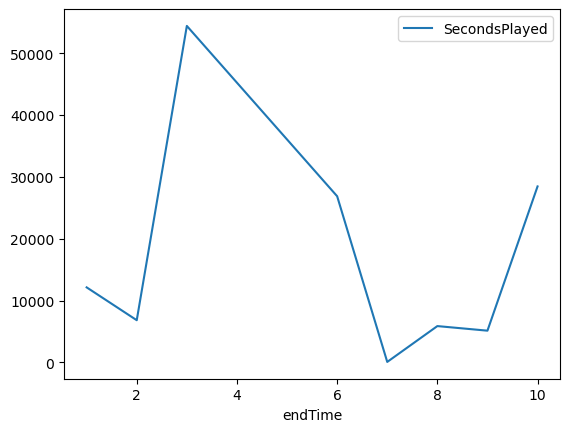

In [13]:
df_monthly_plot.plot.line()

The below code is to use spotify API to retrive track data

In [14]:
# save your IDs from new project in Spotify Developer Dashboard
CLIENT_ID = '9444e5d0012f4b2688a29c093833655c'
CLIENT_SECRET = '87fe2061e440456fa5dafed6388b672d'

In [15]:
# generate access token

# authentication URL
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [16]:
# used for authenticating all API calls
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}

In [17]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

In [18]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [19]:
df_uri = df_library_final["uri"].str.split(":", expand = True)

In [20]:
df_library_final["track_uri"] = df_uri[2]

In [21]:
df_library_final.head(10)

,artist,album,track,uri,track_uri
0,Santhosh Narayanan,Madras,Agayam Theepiditha,spotify:track:19nEFsswIftvopxVMUAM9b,19nEFsswIftvopxVMUAM9b
1,Sid Sriram,Enai Noki Paayum Thota (Original Motion Pictur...,Visiri,spotify:track:5Mt9VMVJc2T5Pa3qKUfw9t,5Mt9VMVJc2T5Pa3qKUfw9t
2,S. P. Balasubrahmanyam,Chandramukhi,Athithom,spotify:track:2NeyA5MOLBZW21zKHBC2G2,2NeyA5MOLBZW21zKHBC2G2
3,G. V. Prakash,Aayirathil Oruvan (Original Motion Picture Sou...,Maalai Neram,spotify:track:3S4ELYAcxunw60elgJwAwn,3S4ELYAcxunw60elgJwAwn
4,Harris Jayaraj,The Legend,Kone Komaane,spotify:track:0pgcemvSQD0ZdZBDtZqY5o,0pgcemvSQD0ZdZBDtZqY5o
5,Vicanes Jay,Adiyeh Kirukki (Single),Adiyeh Kirukki,spotify:track:7kq5biqsSgrS156U5mpBp2,7kq5biqsSgrS156U5mpBp2
6,Alyssa Mendonsa,Zindagi Na Milegi Dobara,Khaabon Ke Parinday,spotify:track:14eotumM24MhIgzidgN3Jx,14eotumM24MhIgzidgN3Jx
7,Santhosh Narayanan,Enakkul Oruvan,Poo Avizhum Pozhudhil,spotify:track:0r1ppERo8Mp5iKg3lANvnB,0r1ppERo8Mp5iKg3lANvnB
8,Matadoria,Marap,Marap,spotify:track:66aRgKCtqQFWLSGeFKgWQt,66aRgKCtqQFWLSGeFKgWQt
9,Ian Storm,Clocks,Clocks,spotify:track:56BxlyQbuS5QGc1QZ9WgfQ,56BxlyQbuS5QGc1QZ9WgfQ


In [22]:
df_library_final.describe()

,artist,album,track,uri,track_uri
count,145,145,145,145,145
unique,75,133,145,145,145
top,A.R. Rahman,Ayan,Agayam Theepiditha,spotify:track:19nEFsswIftvopxVMUAM9b,19nEFsswIftvopxVMUAM9b
freq,14,3,1,1,1
